In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from scipy import signal
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_breuschpagan

In [4]:
data_meteo = pd.read_csv('../data_st/data_meteo_kk.csv')

In [3]:
data = data_meteo.loc[data_meteo['Название метеостанции']=='Анапа']
data_pd = data['Средняя скорость ветра']
data = data['Средняя скорость ветра'].values

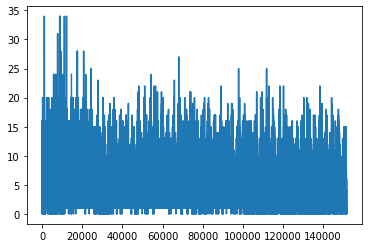

In [4]:
plt.plot(data)
plt.show()


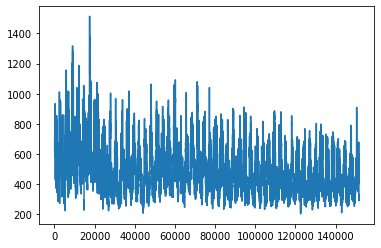

In [5]:
plt.plot(data_pd.rolling(100).sum())
plt.show()

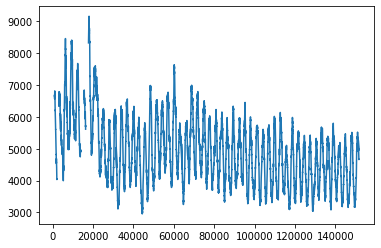

In [6]:
plt.plot(data_pd.rolling(1000).sum())
plt.show()

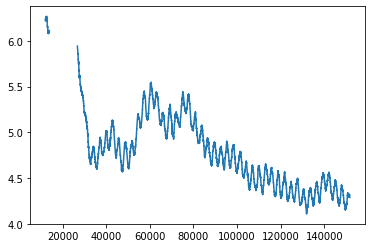

In [40]:
plt.plot(data_pd.rolling(10000).mean())
plt.show()

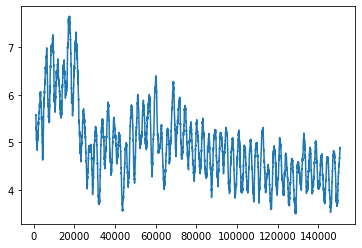

In [50]:
plt.plot(seasonal_decompose(data_pd.dropna(), period=250*8).trend)

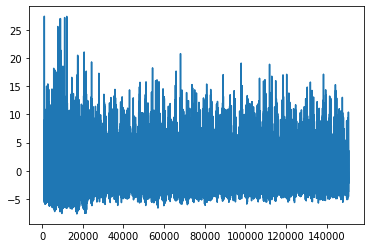

In [25]:
plt.plot(seasonal_decompose(data_pd.dropna(), period=250*8).resid)

<Figure size 14400x7920 with 0 Axes>

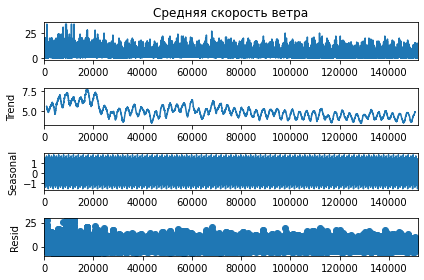

In [15]:
stl_data = seasonal_decompose(data_pd.dropna(), period=250*8)
_ = stl_data.plot()
plt.show()

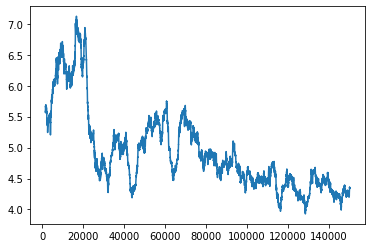

In [24]:
plt.plot(seasonal_decompose(data_pd.dropna(), period=365*8).trend)

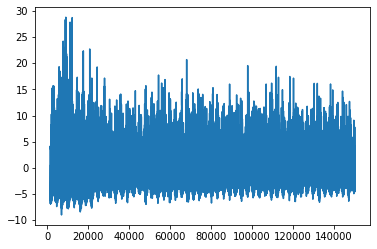

In [26]:
plt.plot(seasonal_decompose(data_pd.dropna(), period=365*8).resid)

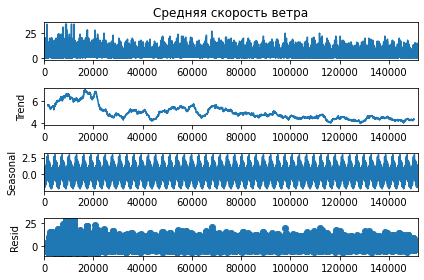

In [16]:
stl_data = seasonal_decompose(data_pd.dropna(), period=365*8)
_ = stl_data.plot()
plt.show()

In [ ]:
res = STL(data_pd.dropna(), period=365*8).fit()
res.plot()
plt.show()

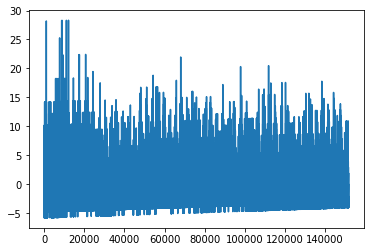

In [21]:
plt.plot(signal.detrend(data_pd.dropna().values))
plt.show()

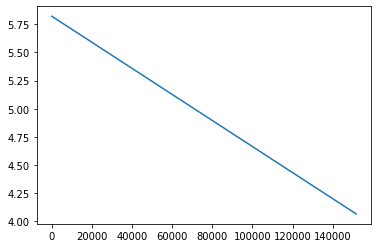

In [22]:
plt.plot(data_pd.dropna().values - signal.detrend(data_pd.dropna().values))

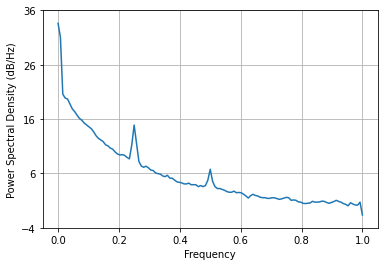

In [35]:
plt.psd(data_pd.dropna().values)
plt.show()

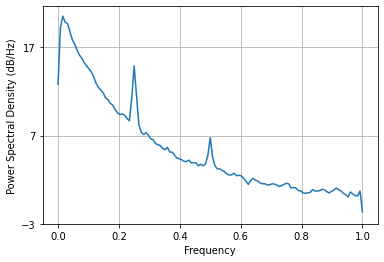

In [34]:
plt.psd(data_pd.dropna().values, detrend='linear')
plt.show()

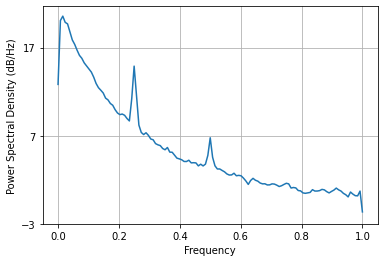

In [36]:
plt.psd(data_pd.dropna().values, detrend='mean')
plt.show()

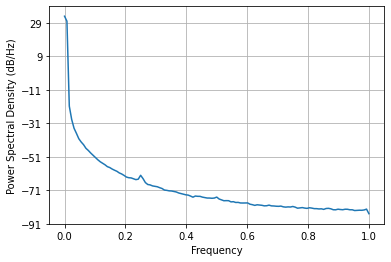

In [10]:
plt.psd(data_pd.rolling(10000).mean().dropna())
plt.show()


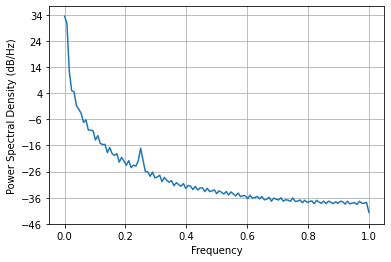

In [13]:
plt.psd(data_pd.rolling(100).mean().dropna())
plt.show()

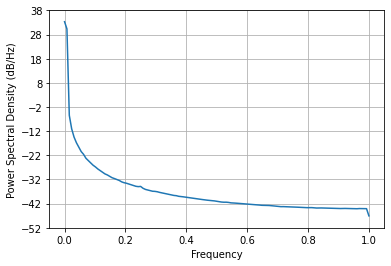

In [14]:
plt.psd(data_pd.rolling(1000).mean().dropna())
plt.show()

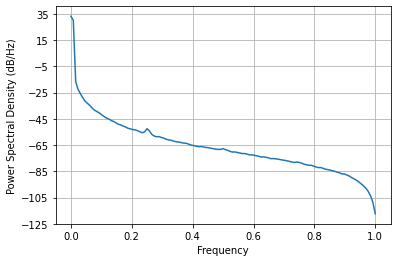

In [16]:
plt.psd(seasonal_decompose(data_pd.dropna(), period=365*8).trend.dropna())
plt.show()

In [20]:
stl_data = seasonal_decompose(data_pd.dropna(), period=365*8)
kpss(stl_data.resid.dropna())

/home/a.kurdyukova/anaconda3/envs/env/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


(0.006507981595789066,
 0.1,
 175,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [18]:
kpss(data_pd.dropna())

/home/a.kurdyukova/anaconda3/envs/env/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


(10.379766498977553,
 0.01,
 185,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [21]:
kpss(stl_data.trend.dropna())

/home/a.kurdyukova/anaconda3/envs/env/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


(37.87408602664726,
 0.01,
 227,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [27]:
res = adfuller(data_pd.dropna())
print(f'p-value: {res[1]}')

p-value: 0.0


In [24]:
res = adfuller(stl_data.resid.dropna())
print('p-value: %s' % res[1])

(-35.68983858229918,
 0.0,
 75,
 148686,
 {'1%': -3.430393981362732,
  '5%': -2.861559439143416,
  '10%': -2.566780346763597},
 607029.3869773069)

In [25]:
adfuller(stl_data.trend.dropna())

(-1.77735893092047,
 0.39175886793121706,
 75,
 148686,
 {'1%': -3.430393981362732,
  '5%': -2.861559439143416,
  '10%': -2.566780346763597},
 -1864413.3397022039)

In [37]:
white_test = het_white(stl_data.resid.dropna(),  exog)
white_test

(5817.936394522755, 0.0, 3027.3044514163657, 0.0)

In [36]:
exog = np.ones((148762, 2))
exog[:,0] = stl_data.trend.dropna()

In [41]:
bp_test = het_breuschpagan(stl_data.resid.dropna(), exog)
bp_test

(5526.984406335824, 0.0, 5740.1760098868335, 0.0)

---------------------------------------------------------------------------------------------------------------------------------------------------------

In [5]:
data = data_meteo.loc[data_meteo['Название метеостанции']=='Анапа']
data_pd = data['Максимальная скорость']

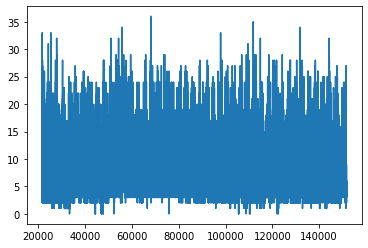

In [7]:
plt.plot(data_pd)
plt.show()

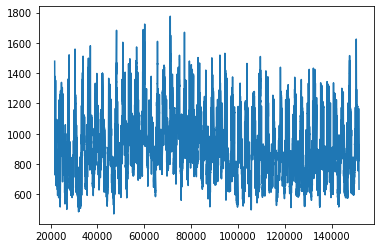

In [8]:
plt.plot(data_pd.rolling(100).sum())
plt.show()

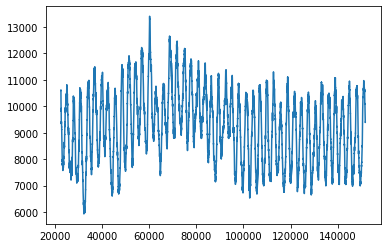

In [9]:
plt.plot(data_pd.rolling(1000).sum())
plt.show()

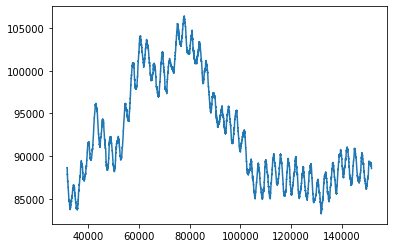

In [10]:
plt.plot(data_pd.rolling(10000).sum())
plt.show()

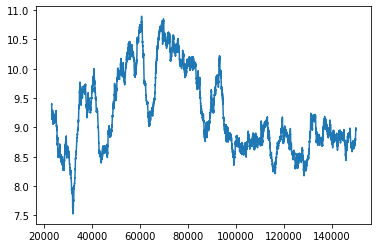

In [13]:
plt.plot(seasonal_decompose(data_pd.dropna(), period=365*8).trend)

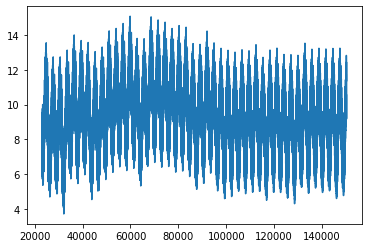

In [14]:
plt.plot(seasonal_decompose(data_pd.dropna(), period=365*8).trend + seasonal_decompose(data_pd.dropna(), period=365*8).seasonal)

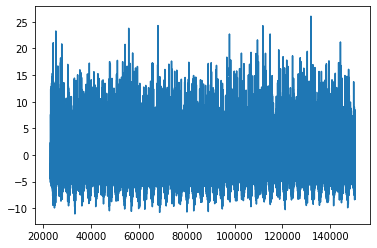

In [15]:
plt.plot(seasonal_decompose(data_pd.dropna(), period=365*8).resid)

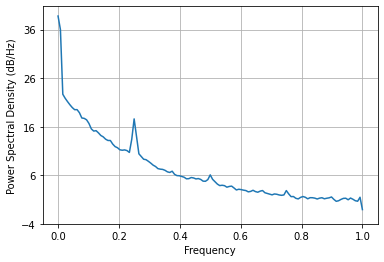

In [16]:
plt.psd(data_pd.dropna().values)
plt.show()

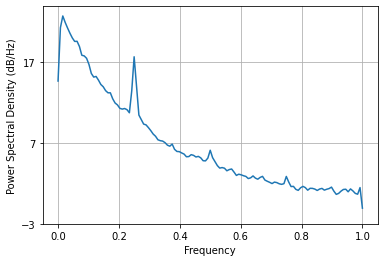

In [17]:
plt.psd(data_pd.dropna().values, detrend='linear')
plt.show()

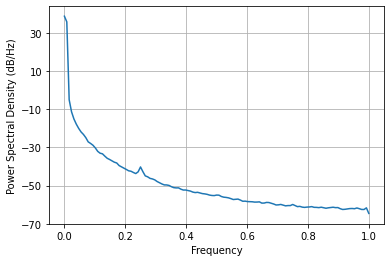

In [18]:
plt.psd(data_pd.rolling(1000).mean().dropna())
plt.show()

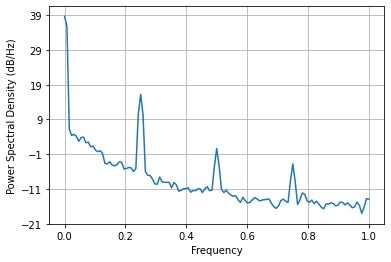

In [20]:
plt.psd((seasonal_decompose(data_pd.dropna(), period=365*8).trend + seasonal_decompose(data_pd.dropna(), period=365*8).seasonal).dropna())
plt.show()

In [21]:
stl_data = seasonal_decompose(data_pd.dropna(), period=365*8)
kpss(stl_data.resid.dropna())

/home/a.kurdyukova/anaconda3/envs/env/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


(0.013476758212082447,
 0.1,
 153,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [22]:
kpss(data_pd.dropna())

/home/a.kurdyukova/anaconda3/envs/env/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


(2.3030604781566844,
 0.01,
 168,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [23]:
kpss((stl_data.trend + stl_data.seasonal).dropna())

/home/a.kurdyukova/anaconda3/envs/env/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2019: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


(3.1677716324691545,
 0.01,
 199,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})